In [346]:
#Import necessary libraries
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
#Make a sentimentAnalyzer Function
def sentimentAnalyzer(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity < -0.2:
        return "negative"
    elif polarity > 0.2:
        return "positive"
    else:
        return "neutral"

In [348]:
#Reading the dataset
df = pd.read_csv("data.csv")

#Print out the column names in the dataframe
print("Column names:", df.columns)

#Select the desired columns
columns_to_keep = ["id", "name", "categories", "reviews.text", "reviews.rating"]
productDF = df[columns_to_keep]

#Make a new data frame with all reviews for a single product
product_id = "AVqkIhwDv8e3D1O-lebb"
productDF = productDF.query("id == @product_id")

productDF.head()

Column names: Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')


C:\Users\safan\AppData\Local\Temp\ipykernel_23656\3577938392.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,id,name,categories,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",I bought this for my grand daughter when she c...,5.0


In [349]:
# Describe the data
product = productDF.iloc[0]
num_cols = productDF.shape[1]
num_rows = productDF.shape[0]
shortest_review_len = min(len(review) for review in productDF["reviews.text"])
print(f"Product Name: {product['name']}\n")
print(f"Number of columns: {num_cols}\n")
print(f"Number of rows: {num_rows}\n")
print(f"Length of shortest review: {shortest_review_len}\n")
print(productDF.describe())

Product Name: All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta

Number of columns: 5

Number of rows: 2814

Length of shortest review: 49

       reviews.rating
count     2814.000000
mean         4.586709
std          0.692333
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000


#Checking the overall sentiment of each review

In [350]:
#Extract the reviews from the productDF
reviews = productDF['reviews.text'].tolist()

#Create new columns 'review_polarity' and 'review_category' in the productDF to store the polarity and category of each review
productDF['review_polarity'] = reviews
productDF['review_category'] = reviews

#Apply the sentimentAnalyzer function to each review in the 'review_polarity' and 'review_category' columns
productDF['review_polarity'] = productDF['review_polarity'].apply(lambda x: TextBlob(x).sentiment.polarity)
productDF['review_category'] = productDF['review_category'].apply(lambda x: sentimentAnalyzer(x))


print(productDF)

                        id                                               name  \
0     AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
1     AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2     AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
3     AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
4     AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
...                    ...                                                ...   
2809  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2810  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2811  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2812  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
2813  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   

                           

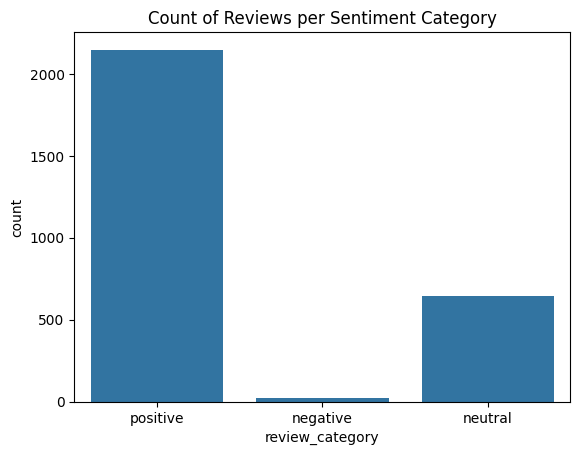

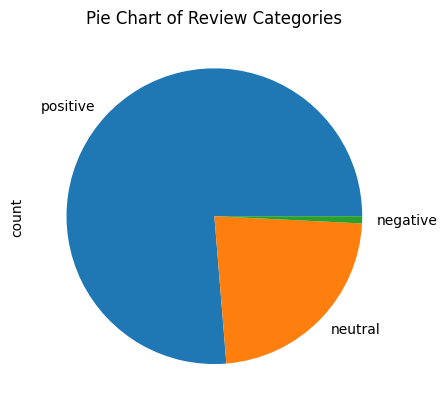

In [351]:
#Bar graph
sns.countplot(x='review_category', data=productDF)
plt.title('Count of Reviews per Sentiment Category')
plt.show()

#Pie chart
productDF["review_category"].value_counts().plot(kind="pie")
plt.title('Pie Chart of Review Categories')
plt.show()

In [352]:
'''Examples of reviews along with their sentiment and polarity'''

#Print positive reviews
print("Positive reviews:")
print(productDF[productDF["review_category"] == "positive"][["reviews.text"]].head())


#Print negative reviews
print("\n\nNegative reviews:")
print(productDF[productDF["review_category"] == "negative"][["reviews.text"]].head())

Positive reviews:
                                        reviews.text
0  This product so far has not disappointed. My c...
1  great for beginner or experienced person. Boug...
2  Inexpensive tablet for him to use and learn on...
3  I've had my Fire HD 8 two weeks now and I love...
4  I bought this for my grand daughter when she c...


Negative reviews:
                                          reviews.text
10   Not easy for elderly users cease of ads that p...
490  not good, hate it , never buy it again, sucks....
556  My only disappointment is the inability to dow...
638  Just lock the card out and let the kids go cra...
644  I purchased this tablet for my Autistic child....


In [353]:
''' Print some insights'''
#Print the number of reviews
print("\nNumber of positive reviews:", len(productDF[productDF["review_category"] == "positive"]))
print("Number of negative reviews:", len(productDF[productDF["review_category"] == "negative"]))
print("Number of neutral reviews:", len(productDF[productDF["review_category"] == "neutral"]))

#Print the average polarity of ositive and negative reviews
avg_pos_polarity = productDF.loc[productDF["review_category"] == "positive", "reviews.text"].apply(lambda x: TextBlob(x).sentiment.polarity).mean()
avg_neg_polarity = productDF.loc[productDF["review_category"] == "negative", "reviews.text"].apply(lambda x: TextBlob(x).sentiment.polarity).mean()

#Print the average length of a positive and a negative review
avg_pos_review_length = productDF.loc[productDF["review_category"] == "positive", "reviews.text"].apply(len).mean()
avg_neg_review_length = productDF.loc[productDF["review_category"] == "negative", "reviews.text"].apply(len).mean()

print("\nAverage polarity of positive reviews:", avg_pos_polarity)
print("Average polarity of negative reviews:", avg_neg_polarity)
print("Average length of positive reviews:", avg_pos_review_length)
print("Average length of negative reviews:", avg_neg_review_length)


Number of positive reviews: 2147
Number of negative reviews: 22
Number of neutral reviews: 645

Average polarity of positive reviews: 0.48993365612616674
Average polarity of negative reviews: -0.4306344696969697
Average length of positive reviews: 142.55659059152305
Average length of negative reviews: 100.9090909090909


In [354]:
#Find examples where rating is more than 4 but sentiment is negative
falseNegative = productDF[(productDF["reviews.rating"] > 4) & (productDF["review_category"] == "negative")]

#Find examples where rating is less than 3 but sentiment is positive
falsePositive = productDF[(productDF["reviews.rating"] < 3) & (productDF["review_category"] == "positive")]

#Reset indicies
falseNegative = falseNegative.reset_index(drop=True)
falsePositive = falsePositive.reset_index(drop=True)

#Print the first 5 rows of falsePositive
falsePositive.head()

,id,name,categories,reviews.text,reviews.rating,review_polarity,review_category
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Didn't have some of the features I was looking...,2.0,0.350000,positive
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",I bought this tablet for my 4 year old daughte...,1.0,0.257143,positive
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",fire tablet is very powerful for the size and ...,2.0,0.487500,positive
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",We bought this earlier on line from another ve...,1.0,0.600000,positive
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Worked great but after awhile I wouldn't unloc...,1.0,0.260000,positive


In [355]:
#Print the first 5 rows of falseNegative
falseNegative.head()

,id,name,categories,reviews.text,reviews.rating,review_polarity,review_category
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Just lock the card out and let the kids go cra...,5.0,-0.937500,negative
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",I purchased this tablet for my Autistic child....,5.0,-0.312500,negative
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",It does everything my kids need without having...,5.0,-0.333333,negative
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",We are a Kindle family! Use them all the time!...,5.0,-1.000000,negative
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",Like the ability to play a game or 2 when I ta...,5.0,-0.400000,negative


In [356]:
import textblob

# Print some insights about falseNegative and falsePositive
print("Number of false positives: " + str(len(falsePositive)))
print("Number of false negatives: " + str(len(falseNegative)))

print("Average polarity of false positives: " + str(falsePositive["reviews.text"].apply(lambda x: textblob.TextBlob(x).sentiment.polarity).mean()))
print("Average polarity of false negatives: " + str(falseNegative["reviews.text"].apply(lambda x: textblob.TextBlob(x).sentiment.polarity).mean()))

print("Average length of false positives: " + str(falsePositive["reviews.text"].apply(len).mean()))
print("Average length of false negatives: " + str(falseNegative["reviews.text"].apply(len).mean()))

Number of false positives: 12
Number of false negatives: 5
Average polarity of false positives: 0.389231436965812
Average polarity of false negatives: -0.5966666666666666
Average length of false positives: 243.16666666666666
Average length of false negatives: 76.4


In [357]:
#Take one example and explain why sentiment analyzer failed
example = falseNegative["reviews.text"][0]
print(example)
print("Sentiment analyzer: " + sentimentAnalyzer(example))
print("Polarity: " + str(textblob.TextBlob(example).sentiment.polarity))

print("\nThe sentiment analyzer failed because it is not trained to recognize sarcasm.\nThe user appears to be sarcastic in this review, but the sentiment analyzer can not interpret it.")

Just lock the card out and let the kids go crazy!!
Sentiment analyzer: negative
Polarity: -0.9375

The sentiment analyzer failed because it is not trained to recognize sarcasm.
The user appears to be sarcastic in this review, but the sentiment analyzer can not interpret it.


In [358]:
# Export to csv
productDF.to_csv("product.csv")